In [177]:
# this is my code for "Challenge 1: Data Exploration" and 'Challenge 2: Machine Learning' 
# at course "Microsoft: DAT102x Data Science Professional Project"
# course url = https://www.edx.org/course/data-science-professional-project-microsoft-dat102x-3

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import mean_squared_error

In [179]:
# Download the data files
X_train = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Predict_Student_Loan_Repayment/train_values.csv', index_col = 'row_id')
y_train = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Predict_Student_Loan_Repayment/train_labels.csv', index_col = 'row_id')

X_test = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Predict_Student_Loan_Repayment/test_values.csv', index_col = 'row_id')

In [180]:
#TODO add explanation of this 
row_id = X_test.index
row_id

Int64Index([    0,     1,     2,     9,    10,    14,    16,    18,    20,
               21,
            ...
            15072, 15074, 15075, 15076, 15077, 15079, 15082, 15087, 15090,
            15092],
           dtype='int64', name='row_id', length=6391)

In [181]:
print(X_train.shape)
print(X_test.shape)

print('Float:', X_train.loc[:, X_train.dtypes == float].shape)
print('Float:', X_test.loc[:, X_test.dtypes == float].shape)

(8705, 443)
(6391, 443)
Float: (8705, 419)
Float: (6391, 419)


In [182]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 3 to 15095
Columns: 443 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(419), int64(1), object(23)
memory usage: 29.5+ MB


In [183]:
# Answears for course question about summary statistics you calculated for the repayment_rate column
print('Minimum repayment_rate: ', y_train.repayment_rate.min())
print('Maximum repayment_rate: ', y_train.repayment_rate.max())
print('Mean repayment_rate: ', y_train.repayment_rate.mean())
print('Median repayment_rate: ', y_train.repayment_rate.median())
print('Standard Deviation of repayment_rate: ', y_train.repayment_rate.std())

Minimum repayment_rate:  5.16270755822
Maximum repayment_rate:  100.473630873
Mean repayment_rate:  47.37086285128498
Median repayment_rate:  44.855045202386776
Standard Deviation of repayment_rate:  20.987641995662944


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


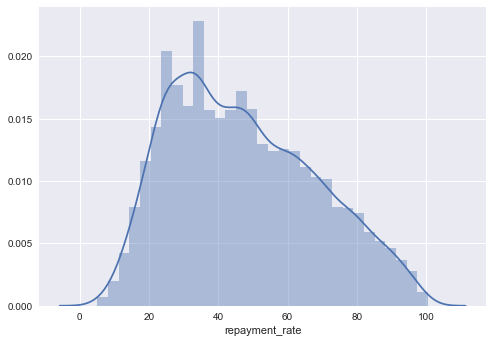

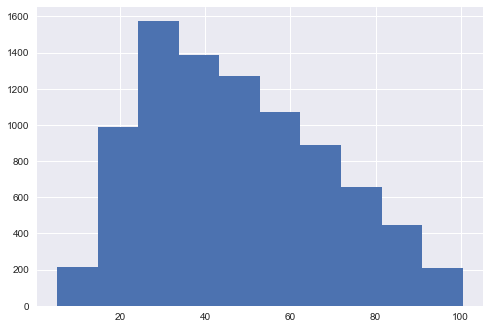

In [184]:
# Question: Which of these histograms most closely resembles the distribution of repayment_rate?
plt.show(sns.distplot(y_train.repayment_rate))
plt.show(plt.hist(y_train.repayment_rate))
# Answear: Histogram C

In [185]:
pd.options.display.max_seq_items = 500
X_train.columns

Index(['academics__program_assoc_agriculture',
       'academics__program_assoc_architecture',
       'academics__program_assoc_biological',
       'academics__program_assoc_business_marketing',
       'academics__program_assoc_communication',
       'academics__program_assoc_communications_technology',
       'academics__program_assoc_computer',
       'academics__program_assoc_construction',
       'academics__program_assoc_education',
       'academics__program_assoc_engineering',
       'academics__program_assoc_engineering_technology',
       'academics__program_assoc_english',
       'academics__program_assoc_ethnic_cultural_gender',
       'academics__program_assoc_family_consumer_science',
       'academics__program_assoc_health', 'academics__program_assoc_history',
       'academics__program_assoc_humanities',
       'academics__program_assoc_language', 'academics__program_assoc_legal',
       'academics__program_assoc_library',
       'academics__program_assoc_mathematics',
 

In [186]:
# Question 'School Ownership vs Repayment Rate'
# Which two of the following statements are true:
# 1) The median repayment rate for privately owned for-profit schools is higher than that of privately owned not-for-profit schools.
# 2) The median repayment rate for privately owned not-for-profit schools is higher than that of public schools.
# 3) The median repayment rate for public schools is higher than that of privately owned for-profit schools.

print(y_train.repayment_rate.groupby(X_train.school__ownership).median().sort_values())

Private_for_profit = y_train.repayment_rate.groupby(X_train.school__ownership).median().ix['Private for-profit', :]
Public = y_train.repayment_rate.groupby(X_train.school__ownership).median().ix['Public', :]
Private_nonprofit = y_train.repayment_rate.groupby(X_train.school__ownership).median().ix['Private nonprofit', :]

print()
print('Answear 1:', Private_for_profit > Private_nonprofit)
print('Answear 2:', Private_nonprofit > Public)
print('Answear 3:', Public > Private_for_profit)

school__ownership
Private for-profit    33.242106
Public                52.392471
Private nonprofit     67.492957
Name: repayment_rate, dtype: float64

Answear 1: False
Answear 2: True
Answear 3: True


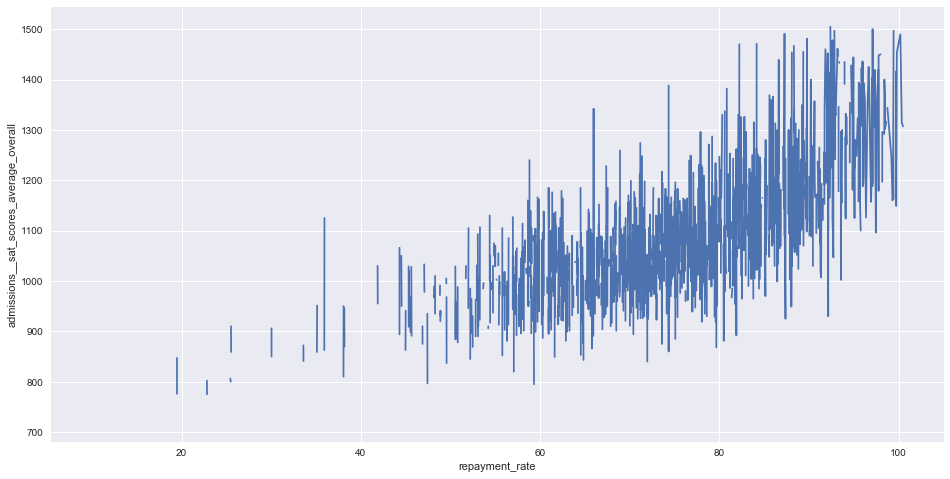

In [187]:
# Question 'SAT Scores vs Repayment Rate'
# Which of the following best describes the apparent relationship between SAT scores and repayment rates?
# 1) Schools that admit students with a higher average overall SAT score tend to have a lower repayment rate.
# 2) Schools that admit students with a higher average overall SAT score tend to have a higher repayment rate.
# 3) Average overall SAT score for school admissions has no discernible relationship with repayment rate.

sort_x, sort_y = zip(*sorted(zip(y_train.repayment_rate, X_train.admissions__sat_scores_average_overall)))
fig, ax = plt.subplots(1, 1, figsize = (16,8))
plt.plot(sort_x, sort_y)
plt.ylabel('admissions__sat_scores_average_overall')
plt.xlabel('repayment_rate')
plt.show()

#TODO add ax title

# Answear: 2) Schools that admit students with a higher average overall SAT score tend to have a higher repayment rate.

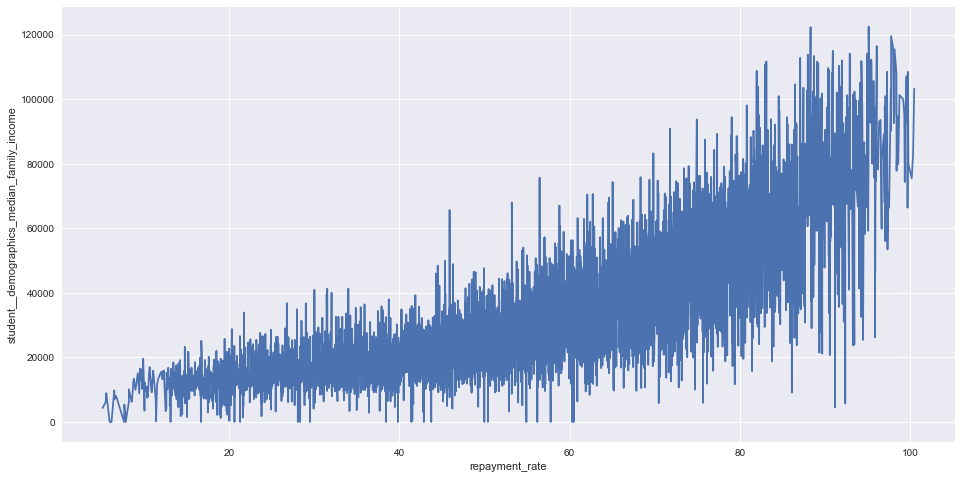

In [188]:
# Question
# Median Family Income vs Repayment Rate
# Which of the following best describes the apparent relationship between median family income and repayment rates?
# 1) Schools where students have a low median family income tend to have a low repayment rate.
# 2) Schools where students have a low median family income tend to have a high repayment rate.
# 3) Median family income has no discernible relationship with repayment rate.

sort_x, sort_y = zip(*sorted(zip(y_train.repayment_rate, X_train.student__demographics_median_family_income)))
fig, ax = plt.subplots(1, 1, figsize = (16,8))
plt.ylabel('student__demographics_median_family_income')
plt.xlabel('repayment_rate')
plt.plot(sort_x, sort_y)
plt.show()

#TODO add ax title

# Answear: 1) Schools where students have a low median family income tend to have a low repayment rate.

In [189]:
# Which of the following school regions has the highest median repayment rate?
# 1) Great Lakes
# 2) Far West
# 3) New England
# 4) Rocky Mountains
X_train.school__region_id

print(y_train.repayment_rate.groupby(X_train.school__region_id).median().sort_values())

# Answear: 3) New England

school__region_id
Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    34.979262
Southwest (AZ, NM, OK, TX)                                    35.721824
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)               39.844847
Far West (AK, CA, HI, NV, OR, WA)                             43.874565
Great Lakes (IL, IN, MI, OH, WI)                              45.356757
Rocky Mountains (CO, ID, MT, UT, WY)                          47.890840
Mid East (DE, DC, MD, NJ, NY, PA)                             54.069880
Plains (IA, KS, MN, MO, NE, ND, SD)                           54.133111
New England (CT, ME, MA, NH, RI, VT)                          62.002451
U.S. Service Schools                                          90.755288
Name: repayment_rate, dtype: float64


In [190]:
X_train.select_dtypes(['object']).columns

Index(['report_year', 'school__carnegie_basic',
       'school__carnegie_size_setting', 'school__carnegie_undergrad',
       'school__degrees_awarded_highest',
       'school__degrees_awarded_predominant',
       'school__institutional_characteristics_level', 'school__locale',
       'school__main_campus', 'school__men_only',
       'school__minority_serving_aanipi', 'school__minority_serving_annh',
       'school__minority_serving_hispanic',
       'school__minority_serving_historically_black',
       'school__minority_serving_nant',
       'school__minority_serving_predominantly_black',
       'school__minority_serving_tribal', 'school__online_only',
       'school__ownership', 'school__region_id',
       'school__religious_affiliation', 'school__state', 'school__women_only'],
      dtype='object')

In [191]:
print('agriculture: ', X_train.academics__program_assoc_agriculture.unique())
print('architecture: ', X_train.academics__program_assoc_architecture.unique())
print('biological: ', X_train.academics__program_assoc_biological.unique())
print('marketing: ', X_train.academics__program_assoc_business_marketing.unique())

agriculture:  [  0.   1.  nan   2.]
architecture:  [  0.  nan   1.   2.]
biological:  [  0.  nan   1.   2.]
marketing:  [  2.   0.   1.  nan]


In [192]:
object_cols = X_train.blocks['object'].columns
float_cols = X_train.blocks['float64'].columns

d1 = dict((col, '') for col in object_cols)
d2 = dict((col, 0) for col in float_cols)
X_train = X_train.fillna(value=dict(d1, **d2))

In [193]:
print(X_train.shape)
print(X_test.shape)

print('Float:', X_train.loc[:, X_train.dtypes == float].shape)
print('Float:', X_test.loc[:, X_test.dtypes == float].shape)

(8705, 443)
(6391, 443)
Float: (8705, 419)
Float: (6391, 419)


In [194]:
object_cols_test = X_test.blocks['object'].columns
float_cols_test = X_test.blocks['float64'].columns

d1_test = dict((col, '') for col in object_cols_test)
d2_test = dict((col, 0) for col in float_cols_test)
X_test = X_test.fillna(value=dict(d1_test, **d2_test))

In [195]:
print(X_train.shape)
print(X_test.shape)

print('Float:', X_train.loc[:, X_train.dtypes == float].shape)
print('Float:', X_test.loc[:, X_test.dtypes == float].shape)

(8705, 443)
(6391, 443)
Float: (8705, 419)
Float: (6391, 419)


In [196]:
#TODO check is is filling NaN?
X_train.loc[:, X_train.dtypes == float] = X_train.loc[:, X_train.dtypes == float].fillna(0)
X_test.loc[:, X_test.dtypes == float] = X_test.loc[:, X_test.dtypes == float].fillna(0)

In [197]:
print(X_train.loc[:, X_train.dtypes == float].shape)
print(X_test.loc[:, X_test.dtypes == float].shape)

(8705, 419)
(6391, 419)


In [198]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler = scaler.fit(X_train.loc[:, X_train.dtypes == float]) 
X_train = scaler.transform(X_train.loc[:, X_train.dtypes == float])
#X_test = scaler.transform(X_test.loc[:, X_test.dtypes == float])

In [199]:
X_test = scaler.transform(X_test.loc[:, X_test.dtypes == float])

In [165]:
print(X_train.shape)
print(X_test.shape)

(8705, 419)
(6391, 419)


In [166]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X_train, y_train, test_size=0.7, random_state=7)

In [167]:
# I trained 4 different models and GradientBoostingRegressor shows the best result. 
# After that I tuned parameters for GBR and delete all code which is related to it.
from sklearn import ensemble
params = {
    'n_estimators': 500, 
    'max_depth': 5, 
    'min_samples_split': 3,
    'learning_rate': 0.05,
    'loss': 'ls',
    'criterion': 'mse'
    }
clf = ensemble.GradientBoostingRegressor(**params)

print("Fitting...")
s = time.time()

clf.fit(data_train, label_train)
print("Fitting completed in: ", time.time() - s)
print(clf)

mse = mean_squared_error(label_test, clf.predict(data_test))
mrse = mean_squared_error(label_test, clf.predict(data_test))**0.5
print("MSE: %.4f" % mse)
print("MRSE: %.5f" % mrse)
print("Score :",(clf.score(data_test, label_test))*100,"%")
#print(clf.feature_importances_) #TODO check it

#MSE: 53.0925
#MRSE: 7.28646
#Score : 87.9754109048 %

Fitting...


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting completed in:  223.28590369224548
GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
MSE: 53.0713
MRSE: 7.28501
Score : 87.9802039988 %


In [168]:
# Train best model on full train dataset
from sklearn import ensemble
params = {
    'n_estimators': 500, 
    'max_depth': 5, 
    'min_samples_split': 3,
    'learning_rate': 0.05,
    'loss': 'ls',
    'criterion': 'mse'
    }
final_model = ensemble.GradientBoostingRegressor(**params)

print("Fitting...")
s = time.time()

final_model.fit(X_train, y_train)
print("Fitting completed in: ", time.time() - s)
print(clf)

#print(clf.feature_importances_) #TODO check it

mse_train_data = mean_squared_error(y_train, final_model.predict(X_train))
mrse_train_data = mean_squared_error(y_train, final_model.predict(X_train))**0.5
print("MSE on train data: %.4f" % mse_train_data)
print("MRSE on train data: %.5f" % mrse_train_data)
print("Score on train data:",(final_model.score(X_train, y_train))*100,"%")

Fitting...


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting completed in:  459.3602931499481
GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
MSE on train data: 13.7866
MRSE on train data: 3.71304
Score on train data: 96.8697348716 %


In [200]:
prediction = final_model.predict(X_test)
prediction

array([ 48.49612534,  42.09460992,  33.43798391, ...,  37.84093581,
        79.78365655,  20.12078436])

In [201]:
row_id

Int64Index([    0,     1,     2,     9,    10,    14,    16,    18,    20,
               21,
            ...
            15072, 15074, 15075, 15076, 15077, 15079, 15082, 15087, 15090,
            15092],
           dtype='int64', name='row_id', length=6391)

In [217]:
answear = pd.DataFrame({'row_id':row_id, 'repayment_rate':prediction})
answear_cols = answear.columns.tolist()
answear_cols = answear_cols[-1:] + answear_cols[:-1]
answear = answear[answear_cols]
answear = answear.set_index(row_id)
del answear['row_id']
answear

,repayment_rate
row_id,
0,48.496125
1,42.094610
2,33.437984
9,88.220188
10,75.027782
14,70.464471
16,11.415038
18,85.415434
20,77.533125


In [218]:
answear.to_csv('answear_csv.csv')
#'C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Predict_Student_Loan_Repayment'

In [169]:
X_test.shape

(6391, 419)